# 数据预处理(preprocessing)

## 打乱顺序

In [1]:
# 生成数据
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target
print(y)
y.shape

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


(150,)

In [0]:
# 索引的随机排列
shuffle_index = np.random.permutation(150) 
y = y[shuffle_index]
y

array([2, 1, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1,
       2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 0, 2, 0, 2, 0, 1, 2, 0,
       0, 2, 1, 2, 1, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 0, 0, 2, 2])

## 数据分离

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423003629.png)

In [2]:
from sklearn.model_selection import train_test_split

#分离数据
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

## 归一化/标准化(Normalization)

### 原理

- 好处:
    - 避免因为量纲问题导致被一个数据主导
    - 都是一种线性变换，都是对向量X按照比例压缩再进行平移
    - 加快收束
    
- 区别:
    - 归一化(Normalization)是将样本的特征值转换到同一量纲下把数据映射到[0,1]或者[-1, 1]区间内，仅由变量的极值决定，因区间放缩法是归一化的一种。
    - 标准化(Standardization)是依照特征矩阵的列处理数据，其通过求z-score的方法，转换为标准正态分布，和整体样本分布相关，每个样本点都能对标准化产生影响。  

- 常用方法  
    - 最值归一化:  
    $$x_{\text {scale}}=\frac{x-x_{\text {mean}}}{s}$$
    - 均值方差归一化  
    $$x_{\text {scale}}=\frac{x-x_{\text {mean}}}{s}$$
  
- 步骤:
    1. 先对训练数据进行归一化/标准化
    2. 再拿训练数据的数学特征(平均数,标准差)对测试数据进行标准化
    3. (x_test-mean_train)/std_train

- 没有进行标准化/归一化
    - ![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200423002739.png)
- 进行了标准化/归一化
    - ![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200423002752.png)  


### Sklearn 例子

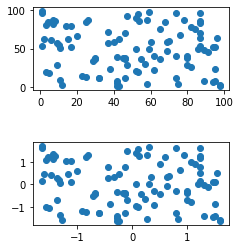

In [8]:
# 可视化
from sklearn.preprocessing import StandardScaler
from matplotlib import gridspec
import numpy as np
import matplotlib.pyplot as plt

cps = np.random.randint(0, 100, (100, 2))
ss = StandardScaler()
std_cps = ss.fit_transform(cps)
 
gs = gridspec.GridSpec(5,5)
fig = plt.figure()
ax1 = fig.add_subplot(gs[0:2, 1:4])
ax2 = fig.add_subplot(gs[3:5, 1:4])
 
ax1.scatter(cps[:, 0], cps[:, 1])
ax2.scatter(std_cps[:, 0], std_cps[:, 1])

In [11]:
# 步骤
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets

# 加载数据
iris = datasets.load_iris()
X = iris.data
y = iris.target
# 分离数据
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
# 加载标准化包
# fit模型
scaler = StandardScaler()
scaler.fit(x_train)
# 传出处理好的数据
x_new_train = scaler.transform(x_train)
x_new_test = scaler.transform(x_test)

# 衡量指标(Metrics)

## 公式

1. **均方误差MSE(mean squared error)**
    - 解决由样本数量不同引起的问题,比如10个样本误差100,10000个样本误差200
$$
\frac{1}{m} \sum_{i=1}^{m}\left(y_{i e s t}^{(i)}-\hat{y}_{i e s t}^{(i)}\right)^{2}
$$

2. **均方根误差RMSE(root mean squared error)**
    - 解决量纲的问题,比如  $万^2$
$$
\sqrt{\frac{1}{m} \sum_{i=1}^{m}\left(y_{t e s t}^{(i)}-\hat{y}_{t e s t}^{(i)}\right)^{2}}=\sqrt{M S E_{t e s t}}
$$

3. **平均绝对误差MAE(mean absolote error)**
$$
\frac{1}{m} \sum_{i=1}^{m}\left|y_{t e s t}^{(i)}-\hat{y}_{t e s t}^{(i)}\right|
$$

4. **R_squared**
    - 分子表示, 使用我们的模型预测产生的错误. 
    - 分母表示y-$y - \bar y$产生的错误  
$${R^2} = 1 - \frac{{S{S_{{\rm{residual}}}}}}{{S{S_{{\rm{total}}}}}}\begin{array}{*{20}{c}}
{({\rm{Residual Sum of Squares}})}\\
{({\rm{Toal Sumof Squares}})}
\end{array}$$  
    - r方小于等于1
    - 越大越好, 当等于1时, 模型不犯错误
    - 当等于0时, 模型等同于基准模型 
$${R^2} = 1 - \frac{{\sum\limits_i {{{\left( {{{\hat y}^{(i)}} - {y^{(i)}}} \right)}^2}} }}{{\sum\limits_i {{{\left( {{{\bar y}^\prime } - {y^{(i)}}} \right)}^2}} }}$$  
$${{\rm{R}}^{\rm{2}}} = 1 - \frac{{MSE(\hat y,y)}}{{{\mathop{\rm Var}\nolimits} (y)}}$$

## 自我实现衡量指标

In [13]:
import numpy as np
from math import sqrt

def accuracy_score(y_true, y_predict):
    """计算y_true和y_predict之间的准确率"""
    assert len(y_true) == len(y_predict), \
        "the size of y_true must be equal to the size of y_predict"
    return np.sum(y_true == y_predict) / len(y_true)


def mean_squared_error(y_true, y_predict):
    """计算y_true和y_predict之间的MSE"""
    assert len(y_true) == len(y_predict), \
        "the size of y_true must be equal to the size of y_predict"
    return np.sum((y_true - y_predict)**2) / len(y_true)

def root_mean_squared_error(y_true, y_predict):
    """计算y_true和y_predict之间的RMSE"""
    return sqrt(mean_squared_error(y_true, y_predict))

def mean_absolute_error(y_true, y_predict):
    """计算y_true和y_predict之间的RMSE"""
    assert len(y_true) == len(y_predict), \
        "the size of y_true must be equal to the size of y_predict"
    return np.sum(np.absolute(y_true - y_predict)) / len(y_true)

def r2_score(y_true, y_predict):
    """计算y_true和y_predict之间的R Square"""
    return 1 - mean_squared_error(y_true, y_predict)/np.var(y_true)

# 过拟合和欠拟合(Overfitting & Underfitting)

## 原理

- 过拟合，过多的表达测试数据(比如噪声)，会使图像尽一切可能拟合测试数据
- 欠拟合，没有完全表达测试数据,预测准确不足
- 机器学习主要解决过拟合
- 可以使用交叉验证的方法防止过拟合  
![2](https://tvax4.sinaimg.cn/large/a17dfad9gy1gd4fgsf7p9j20er0aqac8.jpg)
![1](https://tva2.sinaimg.cn/large/a17dfad9gy1gd4flreyw5j20hz0ango1.jpg)

## 过拟合的例子

mean_squared_error0.6801646332792363


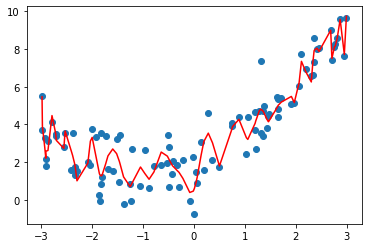

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])
# 最高幂为100的情况
poly10_reg = PolynomialRegression(degree=100)
poly10_reg.fit(X, y)
# 得到预测数据集，打印MSE
y10_predict = poly10_reg.predict(X)
print("mean_squared_error"+str(mean_squared_error(y, y10_predict)))
#画图
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

## 欠拟合的情况

准确率0.4953707811865009


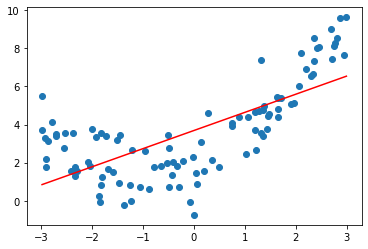

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("准确率"+str(lin_reg.score(X, y)))

y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

# 学习曲线(Learning Curve)

## 原理

- 学习曲线表示，随着训练样本的增多，模型的表现能力
- 图形的纵轴代表误差
- 欠拟合, 训练和测试的误差都很大
- 过拟合, 训练和测试的误差虽然小, 但是二者的差变大
- 完美状态, 二者差距很小, 并且loss值很小
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423011447.jpg)  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423011504.jpg)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423011513.jpg)

## Sklearn实现

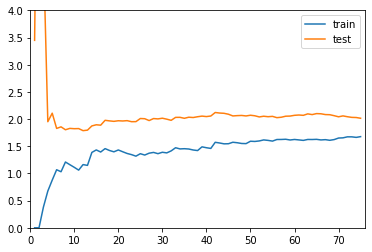

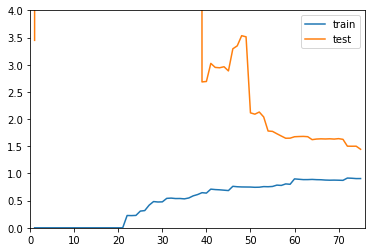

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 生成数据
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)
# 分离数据
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)


def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train) + 1):
        # 依次取1,1-2,1-3,1-4,1-5
        algo.fit(X_train[:i], y_train[:i])
        # 将数据加入train_score = []
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
        # 将数据加入test_score = []
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    # 画图
    plt.plot([i for i in range(1,
                               len(X_train) + 1)],
             np.sqrt(train_score),
             label="train")
    plt.plot([i for i in range(1,
                               len(X_train) + 1)],
             np.sqrt(test_score),
             label="test")
    plt.legend()
    plt.axis([0, len(X_train) + 1, 0, 4])
    plt.show()


def PolynomialRegression(degree):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                     ("std_scaler", StandardScaler()),
                     ("lin_reg", LinearRegression())])


# 画欠拟合
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)
# 画过拟合
poly20_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)

# 交叉验证(Cross Validation)

## 原理

- 不进行交叉验证会对测试数据进行过拟合
- 将数据分为训练train，验证validation，测试test数据集
- k-folds，把训练数据集(包括验证数据集)分成k分：慢了k倍
- LOO-CV(留一法),将m个数据集分为m-1分：完全不受随机测试数据的影响：计算量巨大  
  
    1. 对于小规模样本集（几万量级），常用的分配比例是 60% 训练集、20% 验证集、20% 测试集。
    2. 对于大规模样本集（百万级以上），只要验证集和测试集的数量足够即可，例如有 100w 条数据，那么留 1w 验证集，1w 测试集即可。1000w 的数据，同样留 1w 验证集和 1w 测试集。
    3. 超参数越少，或者超参数很容易调整，那么可以减少验证集的比例，更多的分配给训练集。  

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423013358.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423013418.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423013430.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423014358.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423014412.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423014422.png)

## 实现

In [16]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#载入数据
digits = datasets.load_digits()
X = digits.data
y = digits.target
#不进行交叉验证
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)
best_k, best_p, best_score = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k, best_p, best_score = k, p, score        
print("Best K =", best_k)
print("Best P =", best_p)
print("Best Score =", best_score)

Best K = 3
Best P = 4
Best Score = 0.9860917941585535


In [17]:
#进行交叉验证
from sklearn.model_selection import cross_val_score
#载入knnClassifier
knn_clf = KNeighborsClassifier()
#对训练数据使用交叉验证，默认分为k=5组 cross_val_score(knn_clf, X_train, y_train, cv=5)
cross_val_score(knn_clf, X_train, y_train)
#使用for循环搜索
best_k, best_p, best_score = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        scores = cross_val_score(knn_clf, X_train, y_train)
        score = np.mean(scores)
        if score > best_score:
            best_k, best_p, best_score = k, p, score
            
print("Best K =", best_k)
print("Best P =", best_p)
print("Best Score =", best_score)

best_knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=2, p=2)
best_knn_clf.fit(X_train, y_train)
best_knn_clf.score(X_test, y_test)

Best K = 2
Best P = 2
Best Score = 0.9851507321274763


0.980528511821975

In [18]:
#网格搜索自带交叉验证
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'weights': ['distance'],
    'n_neighbors': [i for i in range(2, 11)],
    'p': [i for i in range(1, 6)]
}]

grid_search = GridSearchCV(knn_clf, param_grid, verbose=1,cv=5)
grid_search.fit(X_train, y_train)

print("grid_search.best_score_" + str(grid_search.best_score_))
print("grid_search.best_params_" + str(grid_search.best_params_))
best_knn_clf = grid_search.best_estimator_
print("best_knn_clf.score" + str(best_knn_clf.score(X_test, y_test)))

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


grid_search.best_score_0.9851507321274763
grid_search.best_params_{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
best_knn_clf.score0.980528511821975


[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   26.9s finished


# 偏差和方差(bias-variance)

## 解释

- 模型的误差 = 偏差 + 方差 + 误差(噪声)

- 偏差
  - 本身假设错误
  - 非线性数据使用线性回归
  - 欠拟合

- 方差
  - 使用的模型太过复杂
  - 过拟合
  - 天生高方差算法KNN

- 降低偏差会提高方差，反之亦然

- 机器学习挑战来自于方差

- 解决方差的手段
  1. 降低模型复杂度
  2. 降维；降噪
  3. 增加样本数
  4. 使用验证数据集  
  5. **模型的正则化**  

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423024403.png)